In [1]:
import pandas as pd

In [2]:
PATH = "./data/"
train_csv = f'{PATH}train.csv'
test_csv = f'{PATH}test.csv'

In [3]:
# Create a submission based solely on an age threshold -> All ages below 40 survived
test = pd.read_csv(test_csv)
train = pd.read_csv(train_csv)
age_df = pd.DataFrame(data=test.Age).fillna(value=test.Age.median())
submission = (age_df["Age"] < 40)*1

submission = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':submission.values})
submission.to_csv(f'{PATH}age_submission.csv', index=False)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
# Create a random forest classifier using Pclass, Age, and Fare (PAF)
X = pd.DataFrame({'Age':train['Age'], 'Pclass':train['Pclass'], 'Fare':train['Fare']})
X['Age'] = X['Age'].fillna(value=X['Age'].median())
X['Pclass'] = X['Pclass'].fillna(value=X['Pclass'].median())
X['Fare'] = X['Fare'].fillna(value=X['Fare'].median())
y = train.Survived.values

X_test = pd.DataFrame({'Age':test['Age'], 'Pclass':test['Pclass'], 'Fare':test['Fare']})
X_test['Age'] = X_test['Age'].fillna(value=X_test['Age'].median())
X_test['Pclass'] = X_test['Pclass'].fillna(value=X_test['Pclass'].median())
X_test['Fare'] = X_test['Fare'].fillna(value=X_test['Fare'].median())

In [6]:
model = RandomForestClassifier(n_estimators=10)

In [7]:
scores = cross_val_score(model, X, y)
scores

array([0.64983165, 0.65993266, 0.64646465])

In [8]:
model.fit(X,y)
y_test_2 = model.predict(X_test)
submission2 = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':y_test})
submission2.to_csv(f'{PATH}second_submission.csv', index=False)

NameError: name 'y_test' is not defined

In [80]:
from fastai.imports import *
from fastai.structured import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [81]:
# Create categories for all non-numeric data types, and then turn 
# all categories into numbers, convert all NA values into the average of the list
PATH = "./data/"
train_csv = f'{PATH}train.csv'
test_csv = f'{PATH}test.csv'
# Create a submission based solely on an age threshold -> All ages below 40 survived
test = pd.read_csv(test_csv)
train = pd.read_csv(train_csv)
train_cats(train)
train_cats(test)
X, y, nas = proc_df(train, y_fld='Survived')
X_test, _, nas = proc_df(test)
X_test = X_test.drop(columns='Fare_na') # Not sure why a 'Fare_na' is created for test but not training

In [11]:
X_train = X[:600]
y_train = y[:600]
X_valid = X[600:]
y_valid = y[600:]

In [83]:
def score(f, y):
    """
    Scoring function for kicks
    """
    return (len(f) - sum(abs(y-f)))/len(f)

In [85]:
??ExtraTreesClassifier

In [88]:
model = ExtraTreesClassifier(n_estimators=100, bootstrap=True,oob_score=True)
model.fit(X,y)
f_valid = model.predict(X_valid)
score(f_valid, y_valid)

1.0

In [89]:
scores = cross_val_score(model, X, y)
scores

array([0.78788, 0.83838, 0.82155])

In [90]:

y_test_6 = model.predict(X_test)
submission2 = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':y_test_6})
submission2.to_csv(f'{PATH}submission_6.csv', index=False)

In [5]:
# Create a small tree to explore what are the main attributes to split on
from fastai.imports import *
from fastai.structured import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create categories for all non-numeric data types, and then turn 
# all categories into numbers, convert all NA values into the average of the list
PATH = "./data/"
train_csv = f'{PATH}train.csv'
test_csv = f'{PATH}test.csv'
# Create a submission based solely on an age threshold -> All ages below 40 survived
test = pd.read_csv(test_csv)
train = pd.read_csv(train_csv)
train_cats(train)
train_cats(test)
X, y, nas = proc_df(train, y_fld='Survived')
X_test, _, nas = proc_df(test)
X_test = X_test.drop(columns='Fare_na') # Not sure why a 'Fare_na' is created for test but not training

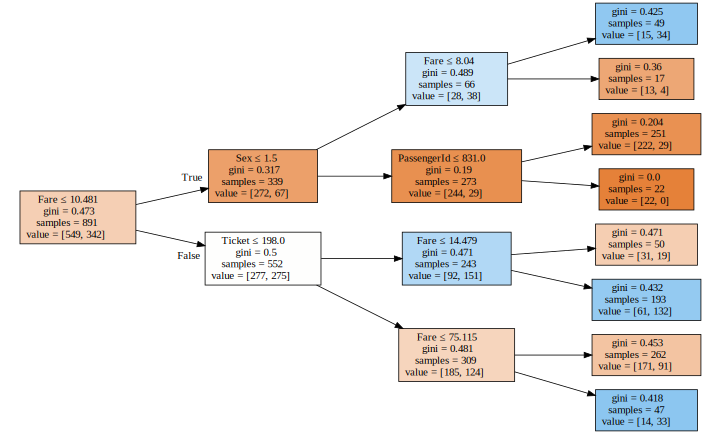

In [11]:
model = RandomForestClassifier(n_estimators=1, max_depth=3, bootstrap=False)
model.fit(X, y)
draw_tree(model.estimators_[0], X, precision=3)
# ??export_graphviz

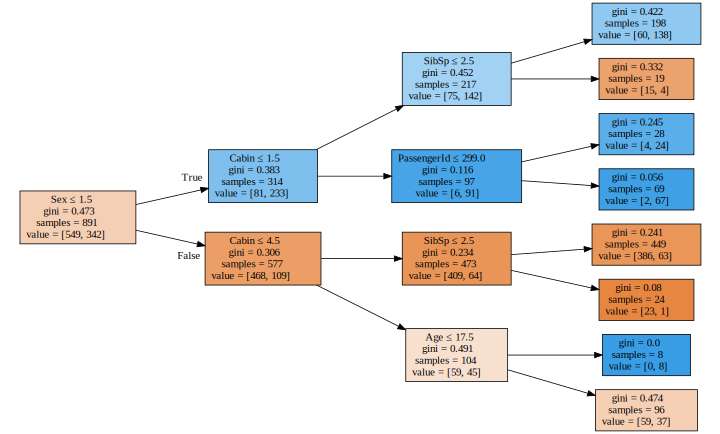

In [14]:
model = RandomForestClassifier(n_estimators=1, max_depth=3, bootstrap=False)
model.fit(X, y)
draw_tree(model.estimators_[0], X, precision=3)

Looking at the decison trees above, it seems that Sex and Cabin are very important for splitting the data. Additionally, it appears from sample submissions of the basic tree model that the RandomForest model currently used is not overfitting to training data. Both the cross-validation scores and the Kaggle score are very close. Further attempts will require feature engineering.

Cabin Type feature engineering
-------------------------------

In [6]:
def cabin_type(df_raw, df):
    """
    Create cabin types based on 'A', 'B', 'C' cabin types
    """
    a_cabin = df_raw.Cabin.str.contains('A').fillna(0)
    b_cabin = df_raw.Cabin.str.contains('B').fillna(0)
    c_cabin = df_raw.Cabin.str.contains('C').fillna(0)
    df['a_cabin'] = a_cabin
    df['b_cabin'] = b_cabin
    df['c_cabin'] = c_cabin
    return df

In [30]:
X = cabin_type(train, X)

In [31]:
model=RandomForestClassifier(n_estimators=100, bootstrap=True, oob_score=True)

In [32]:
model.fit(X, y)
cross_val_score(model, X, y)

array([0.79461, 0.81481, 0.84175])

In [33]:
X_test = cabin_type(test, X_test)

In [34]:
y_test_7 = model.predict(X_test)
submission2 = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':y_test_7})
submission2.to_csv(f'{PATH}submission_7.csv', index=False)

There was no improvement in the score using cabin type as an engineered feature.

Grid Search
-----------
Grid search should allow the model's hyperparameters to be tuned to get the highest possible score

In [7]:
from sklearn.model_selection import GridSearchCV

model=RandomForestClassifier(n_estimators=100, bootstrap=True, oob_score=True)

In [8]:
search_params = {'max_depth': [10,20],
                 'n_estimators': [10, 100],
                 'min_samples_leaf': [1,5],
                 'min_samples_split': [2, 10]}
search = GridSearchCV(model, search_params)
search.fit(X, y)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/paperspace/anaconda3/envs/fastai/lib/p

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/paperspace/anaconda3/envs/fastai/lib/p

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [10, 20], 'n_estimators': [10, 100], 'min_samples_leaf': [1, 5], 'min_samples_split': [2, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
cross_val_score(search.best_estimator_, X, y)
    

array([0.80808, 0.81818, 0.85859])

In [40]:
y_test=search.best_estimator_.predict(X_test)



In [9]:
def save_results(y_test, notes=None):
    """
    Saves the submission results with a number incremented from all submissions currently in the data folder
    """
    import os, re
    files = [name for name in os.listdir('./data') if 'submission_' in name]
    max_submission = int(max([re.findall(r"\d+", f) for f in files])[0])
    new_submission_num = max_submission + 1
    submission = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':y_test})
    submission.to_csv(f'{PATH}submission_{new_submission_num}.csv', index=False)

In [42]:
save_results(y_test)

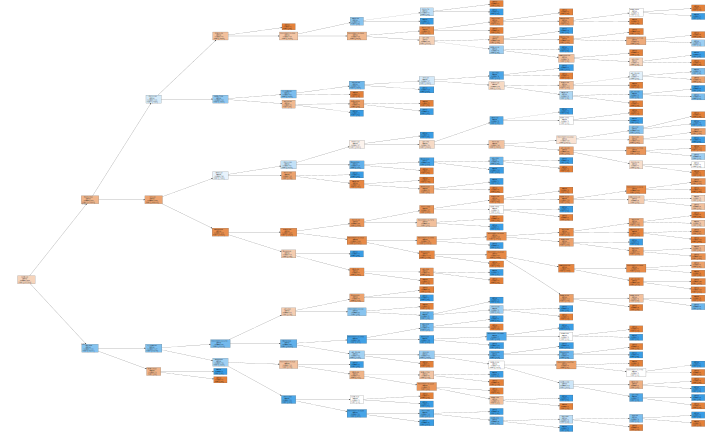

In [67]:
m = search.best_estimator_
m.fit(X, y)
x = draw_tree(m.estimators_[0],X,precision=0, size=10)

In [21]:
set_rf_samples(100)

In [24]:
m = RandomForestClassifier(n_estimators=100)
m.fit(X, y)
cross_val_score(m,X,y)

array([0.77104, 0.81818, 0.82155])

In [46]:
# Examine feature importance
fi = rf_feat_importance(m, X)
fi

,cols,imp
3,Sex,0.174233
7,Ticket,0.138806
8,Fare,0.135002
4,Age,0.111554
2,Name,0.110983
0,PassengerId,0.105492
9,Cabin,0.062798
1,Pclass,0.058061
10,Embarked,0.032385
5,SibSp,0.032013


Looking at feature importance after cabin letters are included, it appears that cabin letter did not impact the score in any way whatsoever. Interestingly, 'PassengerId' is ranked higher than Age in importance, even though it is basically just an index number. What the heck is with that? Additionally, 'Name' has a higher importance than several other factors even though it is essentially an index number.

In [48]:
X = cabin_type(train,X)
m = RandomForestClassifier(n_estimators=100)
m.fit(X, y)
cross_val_score(m,X,y)
fi = rf_feat_importance(m, X)
fi

,cols,imp
3,Sex,0.179144
7,Ticket,0.138153
8,Fare,0.127657
0,PassengerId,0.111707
4,Age,0.105480
2,Name,0.102728
1,Pclass,0.053516
9,Cabin,0.051915
5,SibSp,0.036814
10,Embarked,0.032520


In [69]:
reset_rf_samples()
X_train_new = X[['Age', 'Ticket', 'Fare', 'Age']]
X_valid_new = X[['Age', 'Ticket', 'Fare', 'Age']]
X_test_new = X_test[['Age', 'Ticket', 'Fare', 'Age']]
model=RandomForestClassifier(n_estimators=100, bootstrap=True, oob_score=True)
cross_val_score(model, X_train_new, y_train_new)

array([0.61692, 0.655  , 0.64322])

In [63]:
model.fit(X_train_new, y)
y_test = model.predict(X_test_new)
save_results(y_test)